In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1.Downloading stock prices and Fama-French 3 factors using Python codes

In [ ]:
#Importing Necessary Libraries
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set the list of stocks and the time period
tickers_list = ['AAPL', 'MSFT', 'IBM', 'GOOG', 'UBER']
start_date = dt.datetime(2022,1,1)
end_date = dt.datetime(2022,6,30)

#creating Dataframe for stock prices using python codes
data = pd.DataFrame()

for ticker in tickers_list:
    df = pdr.get_data_yahoo(ticker, start_date, end_date)
    df['ticker'] = ticker
    data = data.append(df)

print(data)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  180.959747   
2022-01-04  182.630005  182.940002  179.119995  179.699997  178.663086   
2022-01-05  179.610001  180.169998  174.639999  174.919998  173.910660   
2022-01-06  172.699997  175.300003  171.639999  172.000000  171.007507   
2022-01-07  172.889999  174.139999  171.029999  172.169998  171.176529   
...                ...         ...         ...         ...         ...   
2022-06-23   21.629999   22.440001   21.389999   22.370001   22

In [ ]:
#downloading Fama-French 3 factors using python code
factors = pdr.get_data_famafrench('F-F_Research_Data_Factors_Daily', start_date, end_date)[0]
factors = factors[1:]
factors.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2022-01-04,-0.29,-0.83,3.63,0.0
2022-01-05,-2.28,-1.46,2.60,0.0
2022-01-06,0.00,0.21,1.75,0.0
2022-01-07,-0.48,-1.31,2.01,0.0
2022-01-10,-0.15,-0.23,-0.28,0.0


In [ ]:
# mergeing/combinng the Stock dataset and the Fama Dataset
merge_data = pd.merge(data, factors, how = 'left', on = ['Date'], )
merge_data.head()

,Open,High,Low,Close,Adj Close,Volume,ticker,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.959747,104487900,AAPL,NaN,NaN,NaN,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.663086,99310400,AAPL,-0.29,-0.83,3.63,0.0
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.910660,94537600,AAPL,-2.28,-1.46,2.60,0.0
2022-01-06,172.699997,175.300003,171.639999,172.000000,171.007507,96904000,AAPL,0.00,0.21,1.75,0.0
2022-01-07,172.889999,174.139999,171.029999,172.169998,171.176529,86709100,AAPL,-0.48,-1.31,2.01,0.0


In [ ]:
merge_data = merge_data.pivot(columns='ticker', values='Adj Close')
merge_data.head()

ticker,AAPL,GOOG,IBM,MSFT,UBER
Date,,,,,
2022-01-03,180.959747,145.074493,129.611923,331.642487,43.950001
2022-01-04,178.663086,144.416504,131.498383,325.955780,44.419998
2022-01-05,173.910660,137.653503,131.688950,313.443024,43.240002
2022-01-06,171.007507,137.550995,128.945007,310.966187,42.029999
2022-01-07,171.176529,137.004501,128.459106,311.124756,41.509998


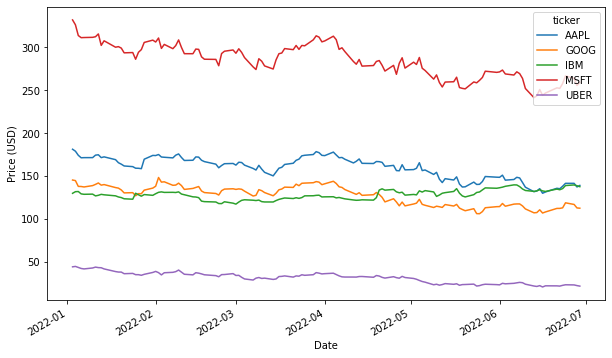

In [ ]:
# Ploting the merged dataset
import matplotlib.pyplot as plt
merge_data.plot(figsize=(10, 6))
plt.ylabel('Price (USD)')
plt.show()

### Mergeing the datasets

In [ ]:
# mergeing/combinng the Stock dataset and the Fama Dataset
ff_merge = pd.merge(merge_data, factors, how = 'left', on = ['Date'], )
ff_merge.head()

,AAPL,GOOG,IBM,MSFT,UBER,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,
2022-01-03,180.959747,145.074493,129.611923,331.642487,43.950001,NaN,NaN,NaN,NaN
2022-01-04,178.663086,144.416504,131.498383,325.955780,44.419998,-0.29,-0.83,3.63,0.0
2022-01-05,173.910660,137.653503,131.688950,313.443024,43.240002,-2.28,-1.46,2.60,0.0
2022-01-06,171.007507,137.550995,128.945007,310.966187,42.029999,0.00,0.21,1.75,0.0
2022-01-07,171.176529,137.004501,128.459106,311.124756,41.509998,-0.48,-1.31,2.01,0.0


### Produce Covariance matrix and summary statistics of Apple stock returns

In [ ]:
# generating log return for stock data:
import numpy as np
log_returns = np.log(merge_data/merge_data.shift())
log_returns = log_returns.dropna()
log_returns.head()

ticker,AAPL,GOOG,IBM,MSFT,UBER
Date,,,,,
2022-01-04,-0.012773,-0.004546,0.014450,-0.017296,0.010637
2022-01-05,-0.026960,-0.047962,0.001448,-0.039144,-0.026924
2022-01-06,-0.016834,-0.000745,-0.021057,-0.007933,-0.028382
2022-01-07,0.000988,-0.003981,-0.003775,0.000510,-0.012449
2022-01-10,0.000116,0.011391,0.001482,0.000732,0.025920


In [ ]:
#Generating the correlating matrix of stocks return
log_returns.corr()

ticker,AAPL,GOOG,IBM,MSFT,UBER
ticker,,,,,
AAPL,1.000000,0.802091,0.426318,0.839956,0.625749
GOOG,0.802091,1.000000,0.341884,0.802900,0.633942
IBM,0.426318,0.341884,1.000000,0.330660,0.184797
MSFT,0.839956,0.802900,0.330660,1.000000,0.622388
UBER,0.625749,0.633942,0.184797,0.622388,1.000000


In [ ]:
#calculating covariance matrix of stocks return
cov = log_returns.cov()
cov

ticker,AAPL,GOOG,IBM,MSFT,UBER
ticker,,,,,
AAPL,0.000512,0.000435,0.000148,0.000427,0.000595
GOOG,0.000435,0.000574,0.000126,0.000432,0.000639
IBM,0.000148,0.000126,0.000236,0.000114,0.000119
MSFT,0.000427,0.000432,0.000114,0.000505,0.000588
UBER,0.000595,0.000639,0.000119,0.000588,0.001770


In [ ]:
#Generating summary statistics of stock return
summary_stats = log_returns.describe()
print(summary_stats)

ticker        AAPL        GOOG         IBM        MSFT        UBER
count   122.000000  122.000000  122.000000  122.000000  122.000000
mean     -0.002174   -0.002102    0.000474   -0.002027   -0.005872
std       0.022618    0.023966    0.015367    0.022473    0.042070
min      -0.058073   -0.052776   -0.040298   -0.046599   -0.123119
25%      -0.018962   -0.018143   -0.008284   -0.017705   -0.034717
50%      -0.000995   -0.000781   -0.000431   -0.000949   -0.010002
75%       0.013747    0.013659    0.007444    0.015405    0.023715
max       0.067451    0.071086    0.068595    0.049831    0.090111


In [ ]:
vars = log_returns.var()
vars

ticker
AAPL    0.000512
GOOG    0.000574
IBM     0.000236
MSFT    0.000505
UBER    0.001770
dtype: float64

### Performing Portfolio Valuation

In [ ]:
#Calculating return for portfolio
portfolio_return = log_returns.mean()
portfolio_return

ticker
AAPL   -0.002174
GOOG   -0.002102
IBM     0.000474
MSFT   -0.002027
UBER   -0.005872
dtype: float64

In [ ]:
# Calculate Sharpe ratio for portfolio
daily_returns = log_returns.mean()
daily_risk = log_returns.std()
sharpe_ratio = daily_returns / daily_risk * np.sqrt(252)

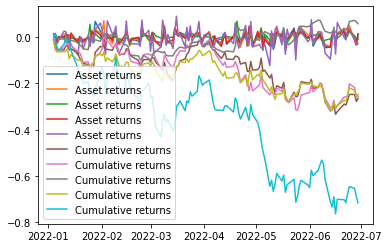

In [ ]:
# Visualize performance of portfolio over time
plt.plot(log_returns, label='Asset returns')
plt.plot(log_returns.cumsum(), label='Cumulative returns')
plt.legend()
plt.show()


In [ ]:
# printing portfolio evaluation
for index, value in portfolio_return.iteritems():
    print(f'Portfolio return for {index}: {value:.2%}')

for index, value in sharpe_ratio.iteritems():
    print(f'Sharpe ratio for {index}: {value:.2f}')


Portfolio return for AAPL: -0.22%
Portfolio return for GOOG: -0.21%
Portfolio return for IBM: 0.05%
Portfolio return for MSFT: -0.20%
Portfolio return for UBER: -0.59%
Sharpe ratio for AAPL: -1.53
Sharpe ratio for GOOG: -1.39
Sharpe ratio for IBM: 0.49
Sharpe ratio for MSFT: -1.43
Sharpe ratio for UBER: -2.22


### Estimating emperical Asset Pricing Models for Apple stock

In [ ]:
#Calculate the returns of the stock and the factors
import numpy as np
return_sf = np.log(ff_merge/ff_merge.shift())
return_sf = return_sf.dropna()
return_sf.head()

,AAPL,GOOG,IBM,MSFT,UBER,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,
2022-04-06,-0.018623,-0.027942,0.003872,-0.037292,-0.045349,-0.216671,-0.400324,0.251314,0.0
2022-04-12,0.011458,-0.011016,-0.003091,-0.011281,-0.001562,-1.663142,0.621688,-0.844187,0.0
2022-05-04,0.040190,0.036942,0.036163,0.028685,-0.047603,1.990210,0.995428,-1.909543,0.0
2022-05-06,0.004716,-0.009350,0.012793,-0.009491,-0.028735,-1.497520,0.510826,-0.291910,0.0
2022-05-09,-0.033753,-0.022524,-0.011684,-0.037645,-0.123119,1.426646,-0.935709,-0.248896,0.0


In [ ]:
sf = return_sf["AAPL"]
ff = return_sf[["Mkt-RF","SMB","HML","RF"]]

In [ ]:
merge_sf = pd.merge(sf, ff, how = 'left', on = ['Date'], )
merge_sf.head()

,AAPL,Mkt-RF,SMB,HML,RF
Date,,,,,
2022-04-06,-0.018623,-0.216671,-0.400324,0.251314,0.0
2022-04-12,0.011458,-1.663142,0.621688,-0.844187,0.0
2022-05-04,0.040190,1.990210,0.995428,-1.909543,0.0
2022-05-06,0.004716,-1.497520,0.510826,-0.291910,0.0
2022-05-09,-0.033753,1.426646,-0.935709,-0.248896,0.0


In [ ]:
# divide value of 03 columns by 100 as they are expressed in percentage:
merge_sf[['Mkt-RF','SMB', 'HML', 'RF']] = merge_sf[['Mkt-RF','SMB', 'HML', 'RF']]/100

# rename column:
merge_sf.rename(columns = {'Mkt-RF': 'Mkt_RF'}, inplace = True)

merge_sf.head()

,AAPL,Mkt_RF,SMB,HML,RF
Date,,,,,
2022-04-06,-0.018623,-0.002167,-0.004003,0.002513,0.0
2022-04-12,0.011458,-0.016631,0.006217,-0.008442,0.0
2022-05-04,0.040190,0.019902,0.009954,-0.019095,0.0
2022-05-06,0.004716,-0.014975,0.005108,-0.002919,0.0
2022-05-09,-0.033753,0.014266,-0.009357,-0.002489,0.0


In [ ]:
# generating Apple excess return
merge_sf['excess_return'] = merge_sf['AAPL'] - merge_sf['Mkt_RF']
merge_sf.head()

,AAPL,Mkt_RF,SMB,HML,RF,excess_return
Date,,,,,,
2022-04-06,-0.018623,-0.002167,-0.004003,0.002513,0.0,-0.016456
2022-04-12,0.011458,-0.016631,0.006217,-0.008442,0.0,0.028089
2022-05-04,0.040190,0.019902,0.009954,-0.019095,0.0,0.020288
2022-05-06,0.004716,-0.014975,0.005108,-0.002919,0.0,0.019691
2022-05-09,-0.033753,0.014266,-0.009357,-0.002489,0.0,-0.048019


In [ ]:
# Estimate the emperical asset pricing for a Apple stock
X = sm.add_constant(merge_sf['Mkt_RF'])
model = sm.OLS(merge_sf['excess_return'], X).fit()

# Print summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          excess_return   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                 -0.086
Method:                 Least Squares   F-statistic:                    0.4449
Date:                Fri, 23 Dec 2022   Prob (F-statistic):              0.530
Time:                        11:13:34   Log-Likelihood:                 16.900
No. Observations:                   8   AIC:                            -29.80
Df Residuals:                       6   BIC:                            -29.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.012      0.214      0.8

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


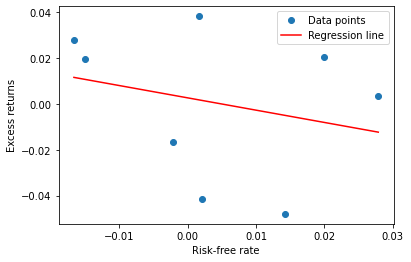

In [ ]:
# Ploting regression line for emperical asset pricing for a Apple stock
plt.plot(merge_sf['Mkt_RF'], merge_sf['excess_return'], 'o', label='Data points')

# Ploting the estimated regression line
x_range = np.linspace(merge_sf['Mkt_RF'].min(), merge_sf['Mkt_RF'].max(), 100)
y_pred = model.params[0] + model.params[1] * x_range
plt.plot(x_range, y_pred, 'r', label='Regression line')

# Adding labels and legend
plt.xlabel('Risk-free rate')
plt.ylabel('Excess returns')
plt.legend()

# Show the plot
plt.show()


### Estimating the Emperical Asset Pricing models for the Portfolio

In [ ]:
pf = return_sf[["AAPL","GOOG","IBM","MSFT","UBER"]]
ff = return_sf[["Mkt-RF","SMB","HML","RF"]]

In [ ]:
merge_pf = pd.merge(pf, ff, how = 'left', on = ['Date'], )
merge_pf.head()

,AAPL,GOOG,IBM,MSFT,UBER,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,
2022-04-06,-0.018623,-0.027942,0.003872,-0.037292,-0.045349,-0.216671,-0.400324,0.251314,0.0
2022-04-12,0.011458,-0.011016,-0.003091,-0.011281,-0.001562,-1.663142,0.621688,-0.844187,0.0
2022-05-04,0.040190,0.036942,0.036163,0.028685,-0.047603,1.990210,0.995428,-1.909543,0.0
2022-05-06,0.004716,-0.009350,0.012793,-0.009491,-0.028735,-1.497520,0.510826,-0.291910,0.0
2022-05-09,-0.033753,-0.022524,-0.011684,-0.037645,-0.123119,1.426646,-0.935709,-0.248896,0.0


In [ ]:
# To calculate the excess return of the portfolio
import pandas as pd

# Stock returns
stock_returns = pf

# Fama-French 3 factors
ff3 = merge_pf

# Portfolio weights
weights = [0.2, 0.2, 0.2, 0.2, 0.2]

# Calculate portfolio returns
portfolio_returns = (stock_returns * weights).sum(axis=1)

# Calculate excess returns
excess_returns = portfolio_returns - ff3['Mkt-RF']


In [ ]:
# Estimateing Emperical asset pricing for the entire portfolio
X = sm.add_constant(ff3['Mkt-RF'])
model_portfolio = sm.OLS(excess_returns, X).fit()
# Print summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          excess_return   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                 -0.086
Method:                 Least Squares   F-statistic:                    0.4449
Date:                Fri, 23 Dec 2022   Prob (F-statistic):              0.530
Time:                        11:13:34   Log-Likelihood:                 16.900
No. Observations:                   8   AIC:                            -29.80
Df Residuals:                       6   BIC:                            -29.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0026      0.012      0.214      0.8

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


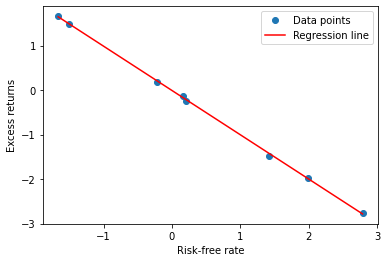

In [ ]:
# Ploting regression line for emperical asset pricing for a Apple stock
# Plot the data points
plt.plot(ff3['Mkt-RF'], excess_returns, 'o', label='Data points')

# Plot the estimated regression line
x_range = np.linspace(ff3['Mkt-RF'].min(), ff3['Mkt-RF'].max(), 100)
y_pred = model_portfolio.params[0] + model_portfolio.params[1] * x_range
plt.plot(x_range, y_pred, 'r', label='Regression line')

# Add labels and legend
plt.xlabel('Risk-free rate')
plt.ylabel('Excess returns')
plt.legend()

# Show the plot
plt.show()

### conducting relevant hypothesis test

In [ ]:
#conducting hypothesis test for the validity of asset pricing model of Apple stock

# formulating the null hypothesis01:
hypothesis01 = 'const=0'


# t test:
model.t_test(hypothesis01)

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0026      0.012      0.214      0.838      -0.028       0.033

In [ ]:
#conducting hypothesis test for the validity of asset pricing model of the whole portfolio

# Specify the dependent and independent variables
endog = excess_returns
exog = ff3[['Mkt-RF', 'SMB', 'HML']]

# Fit the OLS model
est_ff3f = sm.OLS(endog, exog).fit()

# Print the summary of the model
print(est_ff3f.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.833e+04
Date:                Fri, 23 Dec 2022   Prob (F-statistic):                    2.54e-11
Time:                        11:13:34   Log-Likelihood:                          25.410
No. Observations:                   8   AIC:                                     -44.82
Df Residuals:                       5   BIC:                                     -44.58
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#conducting t-test for the whole portfolio
hypothesis02 = 'Mkt-RF=0'
est_ff3f.t_test(hypothesis02)

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.9910      0.003   -318.763      0.000      -0.999      -0.983

In [ ]:
#conducting f-test for the whole portfolio
hypothesis03 = 'Mkt-RF=SMB=HML=0'
est_ff3f.f_test(hypothesis03)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[38329.81259573]]), p=2.5395471603602957e-11, df_denom=5, df_num=3>